# 1. 数据准备

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

1. 读取erythroid_lineage，把pseudotim信息添加上去

In [2]:
adata_filename = "/home/huang/PyCode/scRNA/data/Gastrulation/erythroid_lineage.h5ad" # 实验室服务器的数据路径
adata = sc.read(adata_filename)


cluster_key = "celltype"
pseudotime_key = "pseudotime"

# 提取其中部分细胞，添加伪时间
pseudotime_filename = "../data/velocity_pseudotime.csv"
latent_time_df = pd.read_csv(pseudotime_filename, index_col=0)
adata = adata[latent_time_df.index]
adata.obs[pseudotime_key] = latent_time_df["velocity_pseudotime"]

adata

/tmp/ipykernel_610590/4166988628.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[pseudotime_key] = latent_time_df["velocity_pseudotime"]


AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

/home/huang/.conda/envs/velovi-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


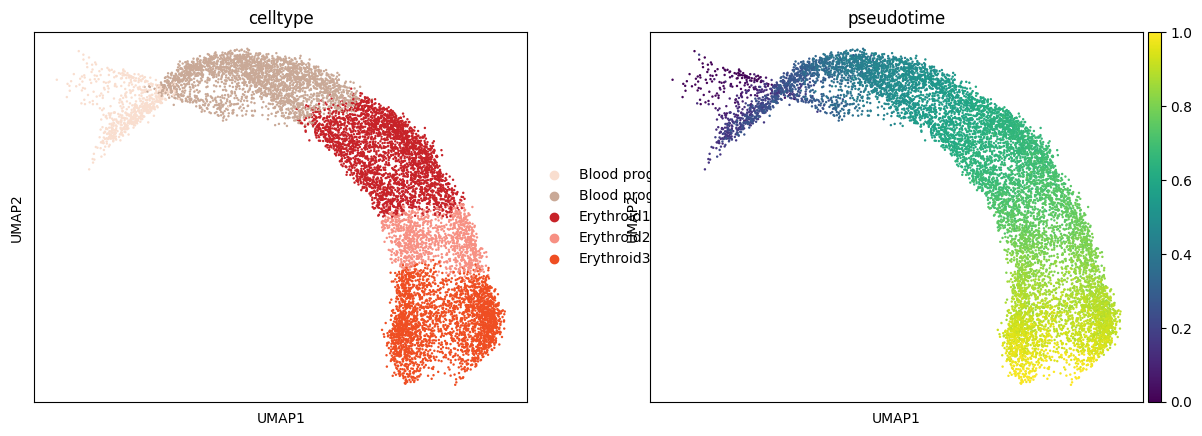

In [3]:
sc.pl.umap(adata, color=[cluster_key, pseudotime_key])

2. 完全按照CellOracle参数

In [6]:
sc.pp.filter_genes(adata, min_counts=1)

sc.pp.normalize_per_cell(adata, key_n_counts='n_counts_all')

# filter_result = sc.pp.filter_genes_dispersion(adata.X,
#                                               flavor='cell_ranger',
#                                               n_top_genes=2000,
#                                               log=False)
# adata = adata[:, filter_result.gene_subset]
hvg_genes = list(pd.read_csv("../data/hvg_genes.csv", index_col=0).iloc[:,0]) # 这里使用上游输出的的基因
adata = adata[:, hvg_genes]

sc.pp.normalize_per_cell(adata)

adata.raw = adata
adata.layers["raw_count"] = adata.raw.X.copy()
# Log transformation and scaling
sc.pp.log1p(adata)
sc.pp.scale(adata)

# PCA, neighbor
sc.tl.pca(adata)
sc.pp.neighbors(adata)

/home/huang/.conda/envs/velovi-env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:524: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


3. 某些基因的查看

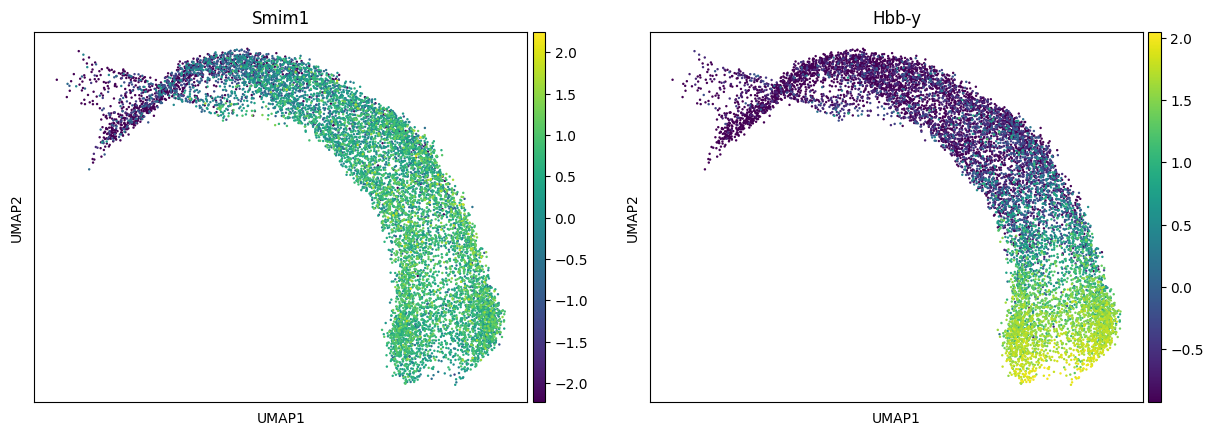

In [7]:
sc.pl.umap(adata, color=["Smim1", "Hbb-y"], use_raw=False, ncols=2)

4. 保存

In [9]:
adata.write("./data/adata_processed.h5ad")